In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create a set aof random latitutudes and longitudes.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [12]:
# Basic URL for the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | mirnyy
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | nouakchott
Processing Record 6 of Set 1 | yazd
Processing Record 7 of Set 1 | pilar
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | saint-augustin
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | san quintin
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | khartoum
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping

Processing Record 38 of Set 4 | mezen
Processing Record 39 of Set 4 | sao joao da barra
Processing Record 40 of Set 4 | russell
Processing Record 41 of Set 4 | merauke
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | cape town
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | ipora
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | jinhua
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | mastic beach
Processing Record 50 of Set 4 | ojinaga
Processing Record 1 of Set 5 | hasaki
Processing Record 2 of Set 5 | saint-louis
Processing Record 3 of Set 5 | gigmoto
Processing Record 4 of Set 5 | port said
Processing Record 5 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 5 | mehamn
Processing Record 7 of Set 5 | kaitangata
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | bethel
Processing Record 10 of Set 5 | meyungs
City not found. Skipping...
P

Processing Record 31 of Set 8 | awjilah
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | churumuco
City not found. Skipping...
Processing Record 34 of Set 8 | la rochelle
Processing Record 35 of Set 8 | kichera
Processing Record 36 of Set 8 | praia da vitoria
Processing Record 37 of Set 8 | ko samui
Processing Record 38 of Set 8 | severnoye
Processing Record 39 of Set 8 | fort-shevchenko
Processing Record 40 of Set 8 | bengkulu
Processing Record 41 of Set 8 | tura
Processing Record 42 of Set 8 | palapye
Processing Record 43 of Set 8 | faya
Processing Record 44 of Set 8 | galesong
Processing Record 45 of Set 8 | nouadhibou
Processing Record 46 of Set 8 | loa janan
Processing Record 47 of Set 8 | lubao
Processing Record 48 of Set 8 | provideniya
Processing Record 49 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 50 of Set 8 | keflavik
Processing Record 1 of Set 9 | vardo
Processing Record 2 of Set 9 | barra patuca
Processing Record 3 of Set 9

Processing Record 16 of Set 12 | fukue
Processing Record 17 of Set 12 | panguipulli
Processing Record 18 of Set 12 | ghugus
Processing Record 19 of Set 12 | coahuayana
Processing Record 20 of Set 12 | chapais
Processing Record 21 of Set 12 | nebaj
Processing Record 22 of Set 12 | krasnaya gora
Processing Record 23 of Set 12 | sao jose da coroa grande
Processing Record 24 of Set 12 | karapyshi
Processing Record 25 of Set 12 | gornyy
Processing Record 26 of Set 12 | kaputa
Processing Record 27 of Set 12 | valparaiso
Processing Record 28 of Set 12 | batsfjord
Processing Record 29 of Set 12 | sungai padi
Processing Record 30 of Set 12 | asfi
Processing Record 31 of Set 12 | ust-tsilma
Processing Record 32 of Set 12 | dubrovytsya
Processing Record 33 of Set 12 | aguimes
Processing Record 34 of Set 12 | acandi
Processing Record 35 of Set 12 | ekhabi
Processing Record 36 of Set 12 | porto walter
Processing Record 37 of Set 12 | cockburn town
Processing Record 38 of Set 12 | toropets
Processin

In [14]:
len(city_data)

543

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.36,55.77,68.00,68,20,20.80,RE,2020-10-30 22:56:39
1,East London,-33.02,27.91,62.01,68,100,2.53,ZA,2020-10-30 22:56:40
2,Mirnyy,62.54,113.96,-7.60,76,0,8.95,RU,2020-10-30 22:56:40
3,New Norfolk,-42.78,147.06,62.01,53,0,1.99,AU,2020-10-30 22:56:40
4,Nouakchott,18.09,-15.98,77.00,69,0,17.22,MR,2020-10-30 22:53:33
5,Yazd,31.90,54.37,57.20,22,0,4.70,IR,2020-10-30 22:56:40
6,Pilar,-9.60,-35.96,75.20,94,20,8.05,BR,2020-10-30 22:56:41
7,Jamestown,42.10,-79.24,36.00,93,90,6.26,US,2020-10-30 22:56:41
8,Rikitea,-23.12,-134.97,76.21,65,0,6.06,PF,2020-10-30 22:56:41
9,Codrington,-38.27,141.97,55.47,82,47,12.41,AU,2020-10-30 22:56:41


In [18]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]



In [19]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2020-10-30 22:56:39,-21.36,55.77,68.00,68,20,20.80
1,East London,ZA,2020-10-30 22:56:40,-33.02,27.91,62.01,68,100,2.53
2,Mirnyy,RU,2020-10-30 22:56:40,62.54,113.96,-7.60,76,0,8.95
3,New Norfolk,AU,2020-10-30 22:56:40,-42.78,147.06,62.01,53,0,1.99
4,Nouakchott,MR,2020-10-30 22:53:33,18.09,-15.98,77.00,69,0,17.22
...,...,...,...,...,...,...,...,...,...
538,Ekhabi,RU,2020-10-30 22:58:55,53.51,142.97,34.70,85,100,5.84
539,Porto Walter,BR,2020-10-30 22:58:56,-8.27,-72.74,73.69,97,100,5.99
540,Cockburn Town,TC,2020-10-30 22:58:56,21.46,-71.14,86.00,70,40,9.17
541,Toropets,RU,2020-10-30 22:58:56,56.50,31.64,45.45,95,100,1.74


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604124146.6402962

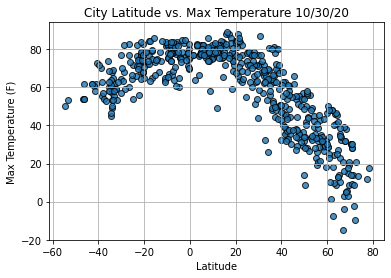

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

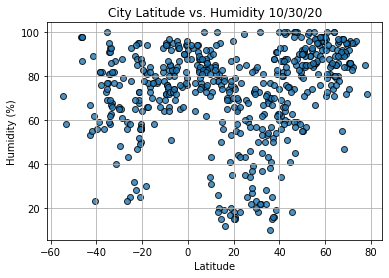

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

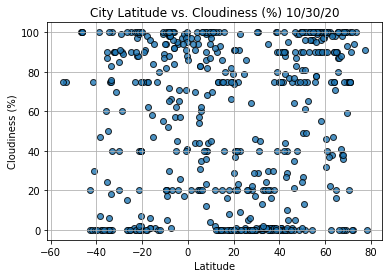

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

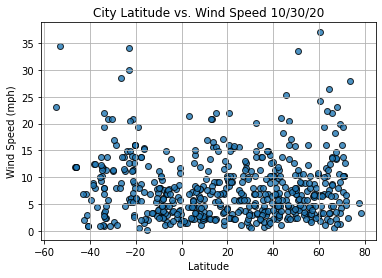

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()